In [42]:
# Importing required modules to perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')

In [43]:
data = pd.read_csv("instagram_reach.csv")
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [44]:
data.shape

(100, 8)

In [45]:
# Checking for Null Values
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [46]:
#Dropping Null valued rows
data = data.dropna()

In [47]:
# Dropping unwanted columns from dataset.
data.drop(columns = ["Unnamed: 0",'S.No'], axis = 1, inplace = True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB


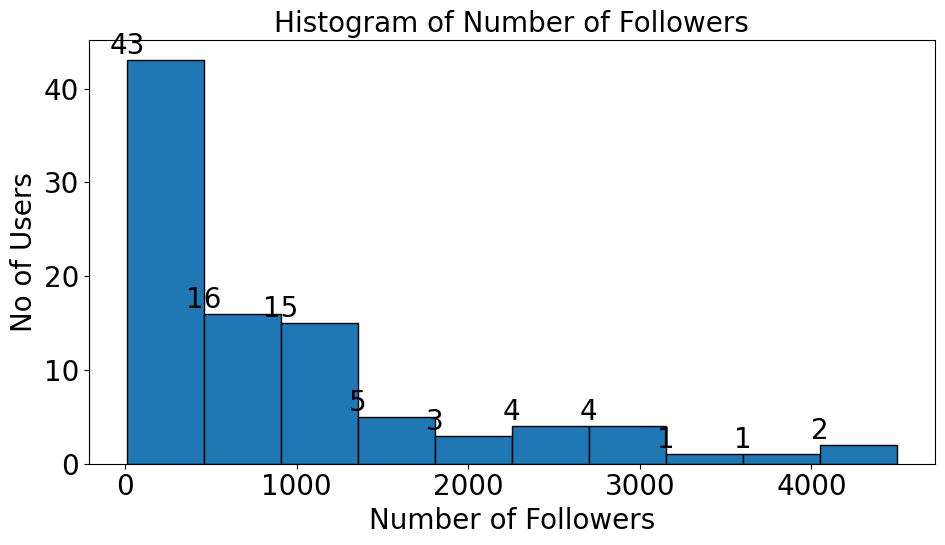

In [49]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data['Followers'], bins=10, edgecolor='black') 
plt.xlabel('Number of Followers',fontsize=20)
plt.xticks(rotation=0,fontsize = 20)
plt.ylabel('No of Users',fontsize=20)
plt.yticks(rotation=0,fontsize = 20)
plt.title('Histogram of Number of Followers',fontsize=20)
for count, bin, patch in zip(n, bins, patches):
    plt.text(bin, count, str(int(count)), ha='center', va='bottom',fontsize=20)
plt.tight_layout()
plt.show()

Insight:

    In the dataset there are a total of 94 users out of which 65 users are having followers less than 1000 & 29 users are having followers more than 1000. 

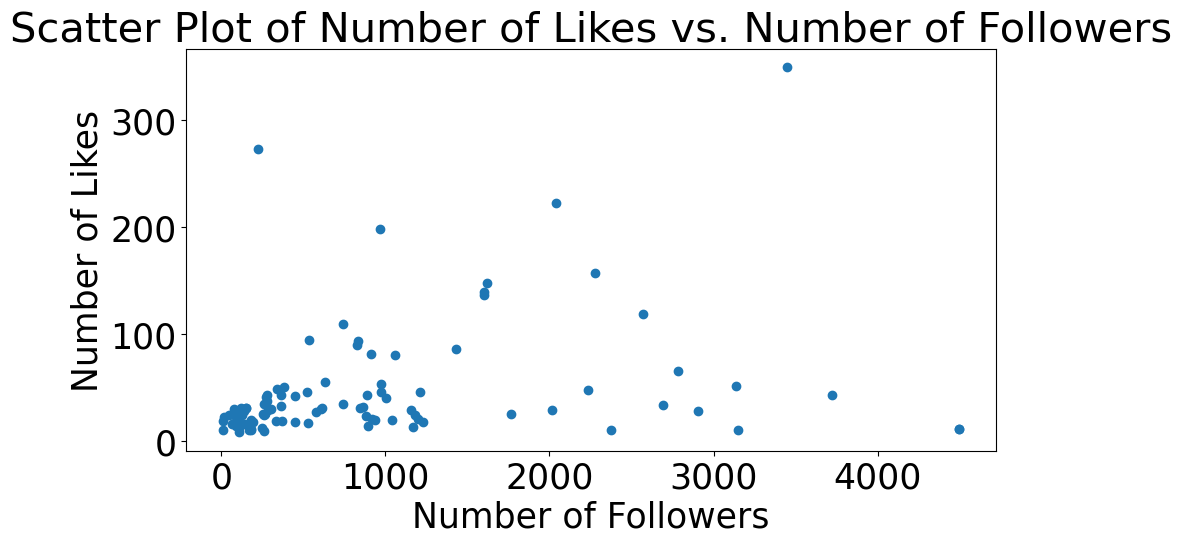

In [50]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(data['Followers'], data['Likes'])
plt.xlabel('Number of Followers')
plt.ylabel('Number of Likes')
plt.title('Scatter Plot of Number of Likes vs. Number of Followers')

plt.tight_layout()  # Adjust the spacing between subplots and labels

plt.show()

In [52]:
data.rename(columns={"Time since posted": "Time since posted( in hours)"}, inplace=True)
data["Time since posted( in hours)"] = data["Time since posted( in hours)"].str.split(" hours").str[0].astype(int)


In [53]:
# lets know what people in this data set are talking about
def WordCloudPlotter(col_name):
    colData = data[col_name]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for i in colData:
        textCloud = textCloud + str(i)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='black', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(col_name))
    plt.tight_layout(pad = 0) 
  
    plt.show() 

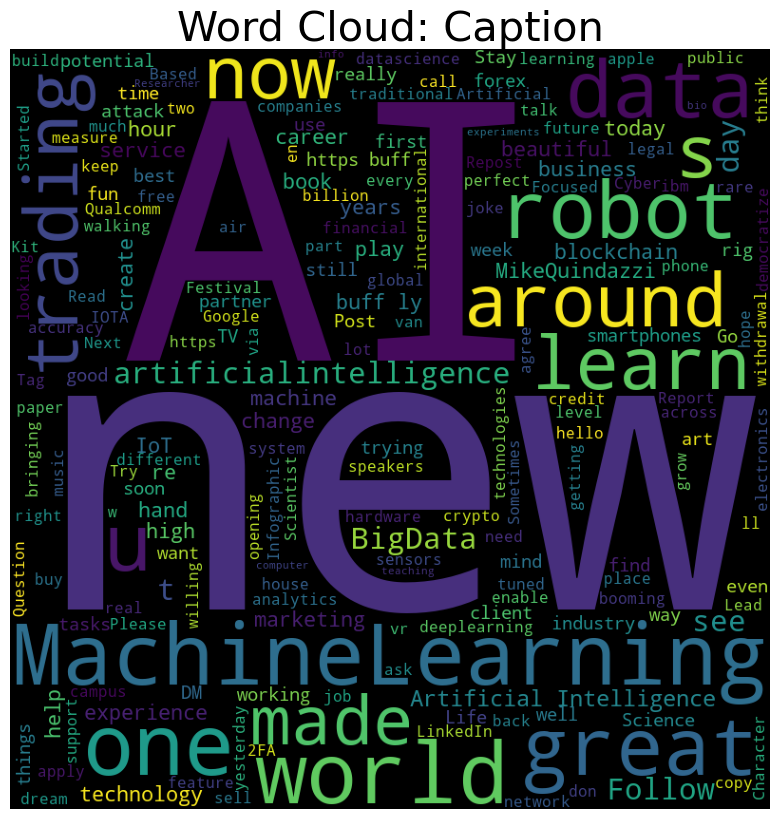

In [54]:
WordCloudPlotter('Caption')

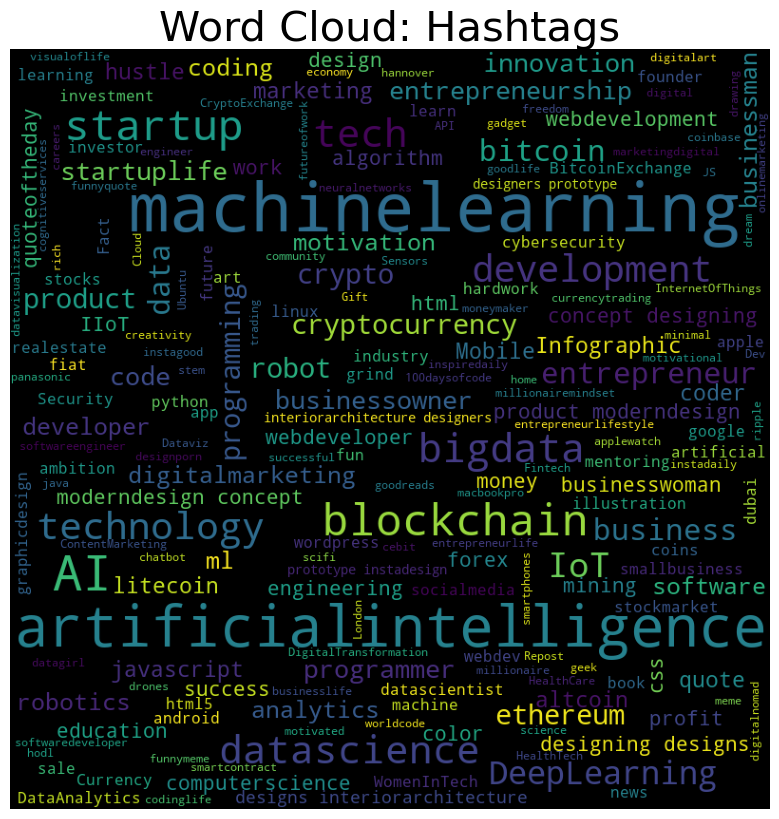

In [55]:
# lets do something similar with hashtags
WordCloudPlotter('Hashtags')

In [56]:
# Selecting features & Target variables
features = ['Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted( in hours)'

In [57]:
#Splitting the data into train & test set
X = data[features]
y_likes = data[target_likes]
y_time_since_posted = data[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [58]:
def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    rsq=r2_score(true,predicted)
    return mse,mae,rmse,rsq

In [59]:
def prediction(X_train, y_train, X_test, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Lasso': Lasso(),
        'Ridge': Ridge(),
        'Elastic Net': ElasticNet()
    }

    model_list = []
    rsq_list = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse, mae, rmse, rsq = evaluate_model(y_test, y_pred)

        print(model_name)
        print("-" * 20)
        model_list.append(model_name)
        rsq_list.append(rsq * 100)
        print('model training performance :')
        print('MSE:', mse)
        print('MAE:', mae)
        print('RMSE:', rmse)
        print('R-Sq:', rsq * 100)
        print("=" * 30, '\n')

    model_report = dict(zip(model_list, rsq_list))

    best_model_score = max(rsq_list)
    best_model_name = list(model_report.keys())[list(model_report.values()).index(best_model_score)]
    best_model = models[best_model_name]

    print(f'Best Model Found, Model Name: {best_model_name}, R-Squared Score: {round(best_model_score, 2)}%')
    print('\n====================================================================================\n')


In [60]:
prediction(X_train, y_likes_train, X_test, y_likes_test)

Linear Regression
--------------------
model training performance :
MSE: 1182.2646244890766
MAE: 25.945085229500005
RMSE: 34.38407515826297
R-Sq: 25.930982575881846

Lasso
--------------------
model training performance :
MSE: 1182.2875654864908
MAE: 25.945414472302286
RMSE: 34.384408755808074
R-Sq: 25.929545319702473

Ridge
--------------------
model training performance :
MSE: 1182.264628373355
MAE: 25.945085285246904
RMSE: 34.38407521474665
R-Sq: 25.93098233253136

Elastic Net
--------------------
model training performance :
MSE: 1182.276240560858
MAE: 25.9452519413392
RMSE: 34.384244074297435
R-Sq: 25.93025482762198

Best Model Found, Model Name: Linear Regression, R-Squared Score: 25.93%




In [61]:
prediction(X_train, y_time_since_posted_train, X_test, y_time_since_posted_test)

Linear Regression
--------------------
model training performance :
MSE: 11.893185237149188
MAE: 2.2593611251578976
RMSE: 3.4486497701490633
R-Sq: -2.1761035366695936

Lasso
--------------------
model training performance :
MSE: 11.893306113616868
MAE: 2.2592462335185304
RMSE: 3.4486672952920334
R-Sq: -2.177142004181065

Ridge
--------------------
model training performance :
MSE: 11.893185238565348
MAE: 2.259361123808075
RMSE: 3.4486497703543844
R-Sq: -2.176103548836017

Elastic Net
--------------------
model training performance :
MSE: 11.893245644019348
MAE: 2.259303628744187
RMSE: 3.4486585281844517
R-Sq: -2.176622500975345

Best Model Found, Model Name: Linear Regression, R-Squared Score: -2.18%


